# Notes on Inharmonicity in stringed instruments
## Guitar string considerations
The design of strings for musical instruments through centuries, has lead to descriptions of parameters giving the best possible tone and correct tonal balance from a specific instrument. A combination of single core strings and overwrapped string covers the instrument-specific pitch range. Generally long strings are required to be overwrapped to handle the low frequency end of the audible spectrum, while single core strings can handle mid and treble frequencies. It is important to maintain a smooth transition in diameter, tension, string characteristic impedance and tonal qualities. Therefore, care has been taken to "merge" the audible impression from the two types of strings. Companies put a lot of thought into how they manufacture wound strings, and the core-to-wrap ratio is an important factor in their designs. 

Some of the physical string parameters are discussed in "The Science of String Instruments" (Rossing et al., 2010) and in greater mathematical detail in "String Design Equations" (Firth et al. 1986). The relation between the tension, length and force applied to the string is:
* $F$    (Feel): The ratio of plucking force to the lateral displacement for a string of length $L$ plucked in the center. [N/m]
* $T$ (Tension): Tension for the given tuning [N]
* $L$  (Length): Length of the string from bridge to nut/finger [m].

The value of $F$ will increase a very small amount, when the pluck position is not in the center of the string, and it should be close to constant over all strings on the guitar for the ease of playing.

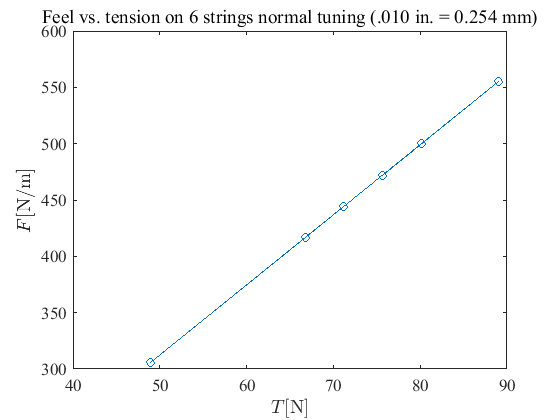

In [1]:
L = 64.11e-2; % Gibson
T = [16 11 15 18 20 17]'*4.45;  
F = 4.*T./L;
figure(1);
    plot(T,F,'-o'); 
    xlabel('$T$[N]','interpreter','latex');
    ylabel('$F$[N/m]','interpreter','latex');
    title('Feel vs. tension on 6 strings normal tuning (.010 in. = 0.254 mm)');

### The string in static action.
When the string is brought to pitch it stretches according to its elastic modulus $E$ which is defined as
\begin{equation}
    E = \frac{\text{Tensile stress}}{\text{Strain}} = \frac{S}{\text{Strain}} = \frac{T/A}{\Delta L/L} \quad \bigg[\frac{N}{m^2}\bigg], 
\end{equation}
where $A$ is the cross sectional area with the core diameter $d$ and $\Delta L$ is the length-extension of the string when brought to pitch. $S=T/A$ is the tensile stress, of the undisturbed string.

The length extension $\Delta L$ is found then
\begin{equation}
    \Delta L = \frac{4T}{\pi d^2} \frac{L}{E}  \quad [m]. 
\end{equation}


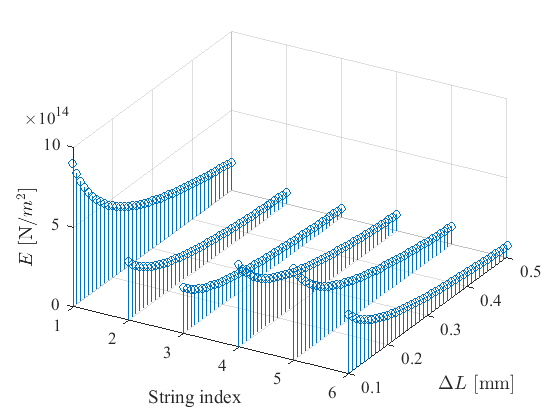

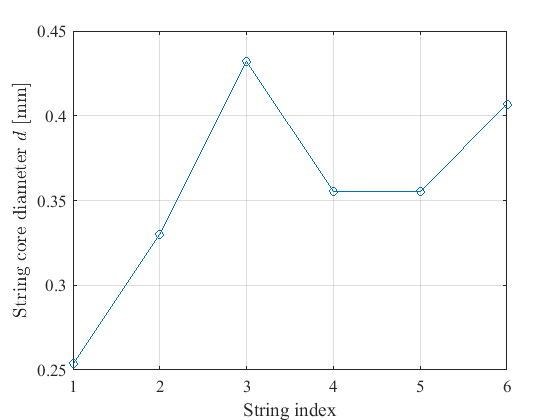

In [2]:
d = [.010 .013 .017 .014 .014 .016]'*0.0254; % wrap=[0 0 0 2*.06 2*.011 2*.015]
% core + wrap: [.010 .013 .017 .026 .036 .46]'*0.0254; % 
figure(2);
    plot([1:6], d*1e3,'-o');
    xlabel('String index');
    ylabel('String core diameter $d$ [mm]','interpreter','latex');grid on;

L = 64.1; % Gibson
T = [16 11 15 18 20 17]'*4.45;  
deltaL = (ones(6,1)*1e-4:1e-5:0.5e-3)';

E = 4*T.*L./(pi*d.^2*deltaL');

figure(3);
    stem3([1:6], deltaL*1e3,E');
    xlabel('String index');
    ylabel('$\Delta L$ [mm]','interpreter','latex');
    zlabel('$E$ [N/$m^2$]','interpreter','latex');
    view(30,40)

The final sound of the string is affected by the string core and wrap component material as well as the core/wrap ratio. Steel is used for a bright, crunchy tone and nickel is used for a slightly warmer, "vintage" tone, while bronze materials are also used.

The specific mass per unit length $\mu$ of a single cored string with volume density $\rho$ is
\begin{equation}
    \mu = \frac{\pi d^2 \rho }{4}  \quad  \bigg[\frac{\text{kg}}{\text{m}}\bigg], 
\end{equation}


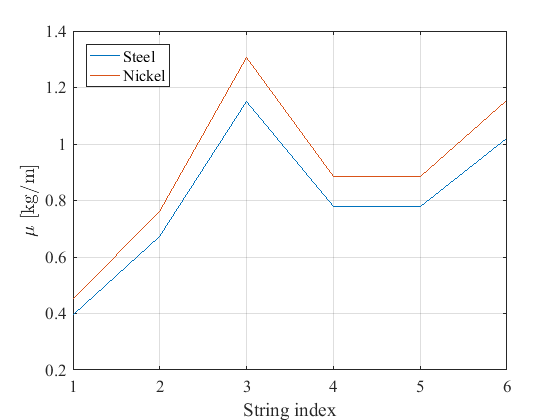

In [20]:
d = [.010 .013 .017 .014 .014 .016]'*0.0254;
rhoSteel = 7850; % kg/m^3
rhoNickel = 8908;
rho = [rhoSteel rhoNickel]';
mu = (pi*d.^2*rho')/(4);

figure(4);
    plot([1:6],mu*1000);
    xlabel('String index');
    ylabel('$\mu$ [kg/m]','interpreter','latex');
    legend('Steel','Nickel','location','northwest'); grid on; 

### Inharmonicity
Inharmonicity in real strings arises because of the presence of stiffness in the strings. Therefore, the partial amplitudes are not not located as perfect multiples of the fundamental frequency. This phenomenon occurs in many forms for many different sound sources such as musical instruments or speech.
The inharmonicity of each string arises from two sources, they are

1) Intrinsic inharmonicity due to the $\textbf{stiffness}$ of the string.

2) $\textbf{Stretching}$ of the string during plucking, which creates an initial pitch shift.

The instrinsic inharmonicity is  ("The Science of String Instruments" (Rossing et al., 2010))
\begin{align}
    \frac {\Delta f_i}{f} = \frac {K}{4} d^2 
\end{align}
and the pitch shift for the maximum transverse deflection $\delta$ (pluck amplitude) is  
\begin{align}
    \frac {\Delta f_p}{f} = \frac {3K}{8} \delta^2. 
\end{align}
It is expected that $d<<\delta$; the pluck deflection is likely to be more than an order of magnitude greater than the string diameter. Hence, the pitch shift caused by plucking dominates the static string inarmonicity. This pitch shift is responsible for the initial twang of the string and dies down rapidly after the pluck. These two terms are related by $K$ which is
\begin{align}
    K = \frac {\pi^3 E d^2}{16 T L^2}. 
\end{align}
The intrinsic string inharmonicity is often given in terms of the partial amplitudes relation to the fundamental, which was derived by ("Normal vibration frequencies of a stiff piano string", Fletcher, 1964) as
\begin{align}
    f_l = l f_0 \sqrt {1 + Bl^2}. 
\end{align}
where $l$ is the partial index and 
\begin{align}
    B = \frac {\pi^2 E d^2}{64\rho_{\text{eff}} L^4 f_0^2} = \frac {\pi^3 E d^4}{64 T L^2}. 
\end{align}
where $\rho_{\text{eff}}$ is the effective density for both core and wrap material.




# Modelling the pluck position
In the following we model the pluck position as it is imprinted on the partial amplitudes in frequency domain. The transverse wave equation for an ideal string is used to initiate the model.

When plucking a string wave components will travel independently in opposite directions. For a small displacement $y$, the motion is described by the partial differential equation as (Principles of vibration and sound, "Fletcher and Rossing, 1994")

\begin{align}
     \frac{\partial^2 y}{\partial t^2} = \frac{T}{\mu}\frac{\partial^2 y}{\partial x^2} = c^2\frac{\partial^2 y}{\partial x^2}
\end{align}
where $c$ is the speed of the transverse wave. The general solution to this equation is a function of position $x$ and time $t$. Using the form of d'Alambert:

\begin{align}
    y(x,t) = f_1(ct-x)+f_2(ct+x),
\end{align}

where the nature of the functions $f_1$ and $f_2$ are arbitrary and they can be chosen so that their sum represents any desired initial displacement $y(x,0)$ and velocity $\frac{\partial y}{\partial t}=\dot{y}(x,0)$.

For the guitar string we consider a string of length $L$ fixed at $x=0$ and $x=L$. This means that $y(0,t)=0$ and $y(L,t)=0$. For fixed ends the general solution can be written as a sum of all normal modes

\begin{align}
     y(x,t) = \sum_n \big(A_n \sin{\omega_nt} + B_n \sin{\omega_nt}\big) \sin{k_nx}
\end{align}

where $k=\omega/c$ is the wave number and the amplitude of the $n$th mode is $\sqrt{A_n^2+B_n^2}$. Each of the normal modes has two coefficients $A_n$ and $B_n$ whose value depend upon the initial exitation of the string. These can be determined by Fourier analysis and they are:

\begin{align}
     A_n &= \frac{2}{\omega_n L} \int_0^L \dot{y}(x,0) \sin{\frac{n \pi x}{L}} dx, \\
     B_n &= \frac{2}{L} \int_0^L y(x,0) \sin{\frac{n \pi x}{L}} dx. 
\end{align}
We will compute the Fourer Coefficients of all the guitar string of length $L$ plucked with initial amplitude $a$ and no initial velocity. The string is plucked at the $P$th fraction of its length ($0<P/L<1$) and the intital shape is triangular. The initial conditions are 

\begin{align}
    \dot{y}(x,0)&=0, \\
    y(x,0) &= \frac{a}{P}\frac{x}{L}, \quad & 0\leq x \leq PL\\
    &= \frac{a}{1-P}(1-\frac{x}{L}),        \quad & PL\leq x \leq L 
\end{align}

\begin{align}
    B_n &= \frac{a}{PL} \int_0^{PL} x \sin{\frac{n\pi x}{L}}\: dx 
        + \frac{a}{1-p} \int_{PL}^L (1-\frac{x}{L}) \sin{ \frac{n\pi x}{L}}\: dx \\
        &= \frac{2a}{n^2 \pi^2 P(1-P)}) \sin{n \pi P }.
\end{align}
This finally leads us to a closed form description of the fourier coefficients that we can use for an estimation of pluck position by regression in the following.

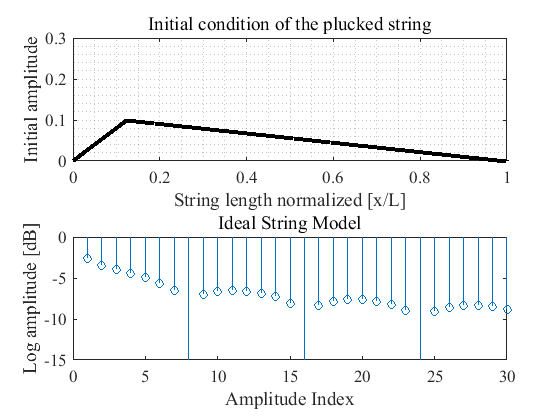

In [200]:
a=0.1;
L = 64;
P=1/8;
x1=0:1e-2:P*L;
x2=P*L:1e-2:L;

figure(5); subplot(211)
    % string
    plot(x1/L, a * (1/P)*x1/L,'k', x2/L, a * 1/(1-P)*(1-x2/L),'k','linewidth',3);
    title('Initial condition of the plucked string');
    xlabel('String length normalized [x/L]');
    ylabel('Initial amplitude');
    axis([0 1 0 a*3]); grid minor;

    
    % amplitudes
    n=[1:30]';
    Bn = ( 2*a )./( n.^2.*pi^2*P*(1-P) ) .* sin(n.*pi*P);

    subplot(212)
        stem(log(abs(Bn)));
        title(sprintf('Ideal String Model'));
        xlabel('Amplitude Index');
        ylabel('Log amplitude [dB]'); ylim([-15 0]);

The above figures show the intital condition of the string and the consequential Fourier coefficients. In this case the $P=\frac{L}{8}$ and therefore every $8$th has zero energy in the model. This leads us to the regression model that we will use in the following.

### Estimating the pluck position
We will estimate the pluck position by defining the consecutive relational amplitudes as


\begin{align}
    \Delta{a}_n &= \log \lvert a_{n+1}\rvert -  \log  \lvert a_{n} \rvert, \quad \\  
    \Delta{B}_n(P) &= \log \lvert B_{n+1}(P)\rvert -  \log  \lvert B_{n}(P) \rvert.  
\end{align}
To estimate the pluck position $\hat{P}$ we minimize the error function which is
\begin{align}
   J(P) =  \left\lvert \sum_n  \Delta a_n-\Delta B_{n,P} \right\rvert
\end{align}
\begin{align}
    \hat{P} = \underset{P}{\operatorname{argmin}} J(P). 
\end{align}
This gives the correct estimate of pluck position as seen in the following plots, where we compare the amplitude estimates to model found by minimizing the error cost function. The specific cost function is shoen in the next figure.

Computing miraudio related to position_4_duration_40ms_string5_rec11.wav...
Computing mirsum related to position_4_duration_40ms_string5_rec11.wav...
Elapsed time is 0.336982 seconds.
pluckCmFromBridge =
    9.9570


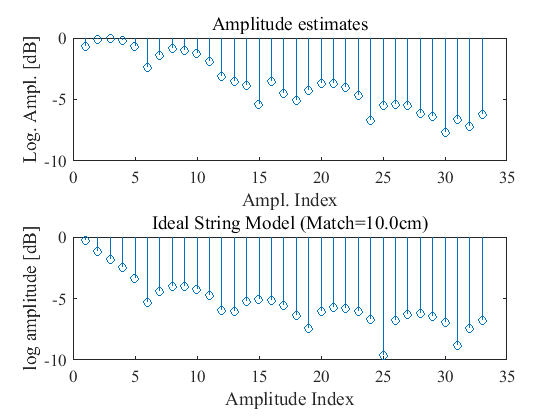

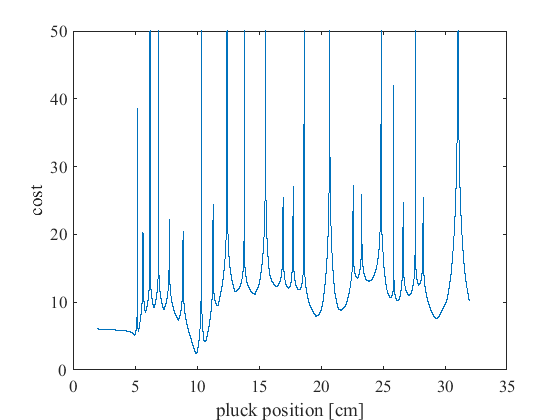

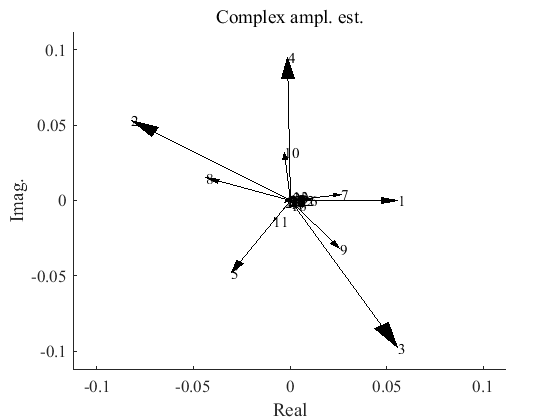

In [204]:
clear all; close all;
cd /home/jacob/pluck_position/sp/

positionIndex =4;
stringIndex=5;
recordingIndex=11;

extract_complex_amplitudes

### Time analysis of inharmonicity
In the following we show some estimated inharmonicity coefficients over time. It can be seen from the figures that the inharmonicity decays over time, which confirms that the inharmonicity arises from both the intrinsic part and from the initial pitch shift, based on  the displacement caused by the pluck. 
It is interesting to notice from the partials, that the partials that should be missing as modelled in the following, seems to be increasing over time from the pluck position and forward, which is an interesting feature.

Computing mirfilterbank related to x...
Computing mirenvelope related to x...
Computing mirenvelope related to x...
Computing mironsets related to x...
Computing mirenvelope related to x...
Computing mirenvelope related to x...
Computing mirsum related to x...
Computing mirenvelope related to x...
Computing mirpeaks related to x...
onsetInSeconds =
    0.3038


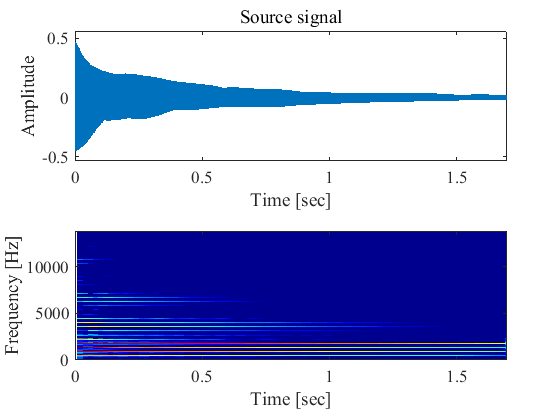

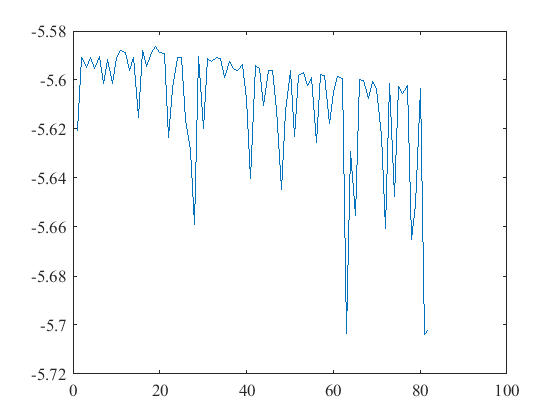

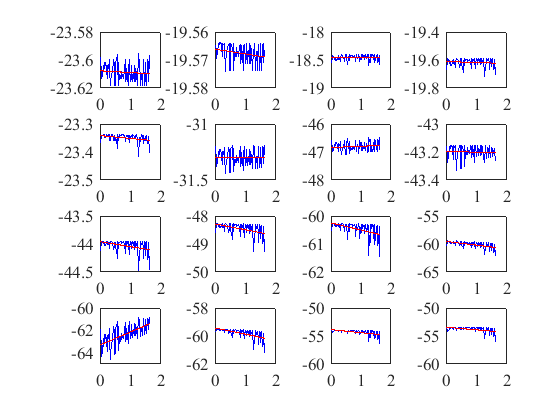

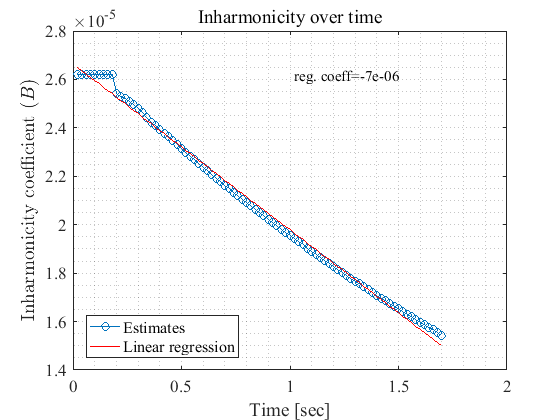

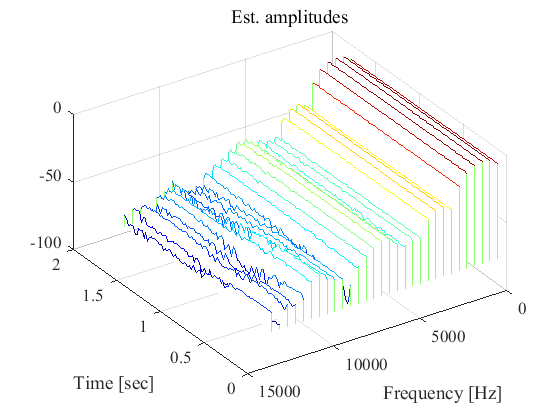

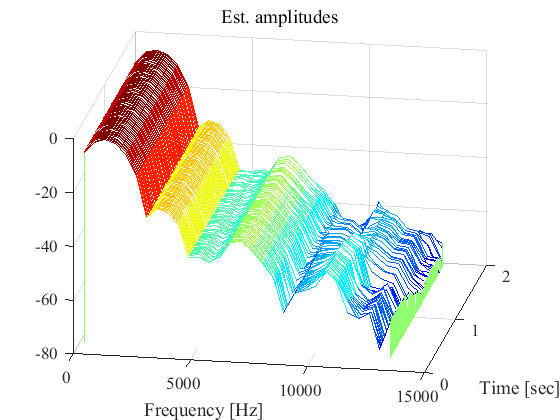

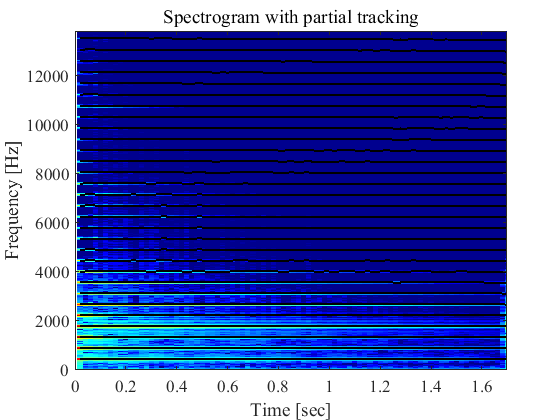

In [195]:
cd /home/jacob/pluck_position/sp/MIR
spectral_decay;

### Dynamic Behaviour
The velocity of the transverse wave on a specific string of a given material is
\begin{equation}
    v = \sqrt{\frac{T}{\mu}}.
\end{equation}
Standing waves on a ideal string with no stiffness is
\begin{align}
    f_n = {\frac{1}{2 L}} n v  &= {\frac{n}{2 L}} \sqrt{\frac{T}{\mu}}\\
    &= \frac{n}{2 L} \sqrt{ \frac{4T}{\pi d^2 \rho} } .
\end{align}
for $n=1,\cdots,N$.
When brought to the fundamental vibration the tension is
\begin{align}
    T = \pi \rho L^2 f_0^2 d^2,
\end{align}
and the tensile stress is
\begin{align}
    S = 4 \rho L^2 f_0^2,
\end{align}
independent of the string diameter. To obtain a working fundamental frequency $f_0$, the static length extension $\Delta L$ is therefore
\begin{align}
     \Delta L = \frac{16 \rho L^3 f_0^2}{E}.
\end{align}


### Pitch change due to string distortion
When a string is plucked a increase in length $\Delta l$ is produced, which is related to a change in string tension by using Hookes Law we have
\begin{align}
    \frac{\Delta T}{A}  &= E \frac{\Delta l}{L} \quad \bigg[\frac{\text{N}}{m^2}\bigg].\\ 
    \frac{\Delta T}{T}  &= \frac{E}{S} \frac{\Delta l}{L} \quad [\cdot]. 
\end{align}
where $S=T/A$ is the string stress of the undisturbed string. Such distortions are caused by plucking the string and also by pressing the string against the fretboard.

When applying a plucking force $F_p$ perpendicular to the string at the point located at length $L_1$ from the bridge, this point is transversely displaced by $\delta$. When we assume that $\delta<<L$ then ("Strings in the 16th and 17th Centuries", Abbot et al. 1974)
\begin{equation}
    \frac{\Delta l}{L} = \frac{\delta}{2L_1(L-L_1)}  \quad [m]. 
\end{equation}
Such a length-extension gives rise to an increase in tension
\begin{equation}
    \Delta T = \frac{E A \delta}{2L_1(L-L_1)}  \quad [N],
\end{equation}
which consequently leads to a vibration frequency higher than the equilibrium and static tension. Hence, on releasing the string from the displacement position $\delta$ the decay in amplitude leads to a decay in frequency, i.e. 
\begin{equation}
    \Delta T \propto E \delta \quad [N].
\end{equation}
Since the vibration is proportional to the tension, we will encounter a higher pitch in the beginning of a pluck, which decays. This expression is found by assuming that the pluck position $L_1$ is irrelevant, we can see that the tension is proportional to the product of displacement and the elastic modulus of the string.